### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key=""

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-3-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-12-27 00:00:00+00:00,156.15,156.77,150.07,155.84,53117065,37.467441,37.616207,36.008574,37.393058,212468260,0.0,1.0
1,AAPL,2018-12-28 00:00:00+00:00,156.23,158.52,154.55,157.50,42291424,37.486636,38.036111,37.083528,37.791367,169165696,0.0,1.0
2,AAPL,2018-12-31 00:00:00+00:00,157.74,159.36,156.48,158.53,35003466,37.848954,38.237665,37.546623,38.038510,140013864,0.0,1.0
3,AAPL,2019-01-02 00:00:00+00:00,157.92,158.85,154.23,154.89,37039737,37.892144,38.115293,37.006746,37.165110,148158948,0.0,1.0
4,AAPL,2019-01-03 00:00:00+00:00,142.19,145.72,142.00,143.98,91312195,34.117806,34.964812,34.072216,34.547308,365248780,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-12-18 00:00:00+00:00,195.89,196.63,194.39,196.09,55751861,195.89,196.63,194.39,196.09,55751861,0.0,1.0
1253,AAPL,2023-12-19 00:00:00+00:00,196.94,196.95,195.89,196.16,40233138,196.94,196.95,195.89,196.16,40233138,0.0,1.0
1254,AAPL,2023-12-20 00:00:00+00:00,194.83,197.68,194.83,196.90,52242815,194.83,197.68,194.83,196.90,52242815,0.0,1.0
1255,AAPL,2023-12-21 00:00:00+00:00,194.68,197.08,193.50,196.10,46482549,194.68,197.08,193.50,196.10,46482549,0.0,1.0
1256,AAPL,2023-12-22 00:00:00+00:00,193.60,195.41,192.97,195.18,37149570,193.60,195.41,192.97,195.18,37149570,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       156.15
1       156.23
2       157.74
3       157.92
4       142.19
         ...  
1252    195.89
1253    196.94
1254    194.83
1255    194.68
1256    193.60
Name: close, Length: 1257, dtype: float64

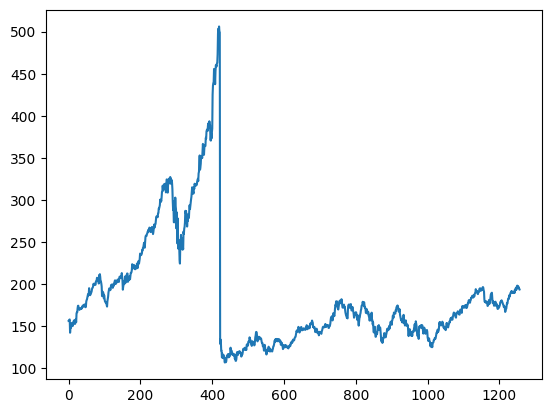

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [13]:
import numpy as np

In [14]:
df1

0       156.15
1       156.23
2       157.74
3       157.92
4       142.19
         ...  
1252    195.89
1253    196.94
1254    194.83
1255    194.68
1256    193.60
Name: close, Length: 1257, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.12350657]
 [0.12370695]
 [0.12748904]
 ...
 [0.22038823]
 [0.22001252]
 [0.21730745]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 440)

In [19]:
train_data

array([[1.23506575e-01],
       [1.23706951e-01],
       [1.27489042e-01],
       [1.27939887e-01],
       [8.85410144e-02],
       [1.03744521e-01],
       [1.02917971e-01],
       [1.09981215e-01],
       [1.16393237e-01],
       [1.17620539e-01],
       [1.13838447e-01],
       [1.08102693e-01],
       [1.15792110e-01],
       [1.20475892e-01],
       [1.22780213e-01],
       [1.25184721e-01],
       [1.16368190e-01],
       [1.17921102e-01],
       [1.14865373e-01],
       [1.27539136e-01],
       [1.23882279e-01],
       [1.19824671e-01],
       [1.46299311e-01],
       [1.49279900e-01],
       [1.49480276e-01],
       [1.61327489e-01],
       [1.68666249e-01],
       [1.68816531e-01],
       [1.60551033e-01],
       [1.59223544e-01],
       [1.56768942e-01],
       [1.60425798e-01],
       [1.58647464e-01],
       [1.60200376e-01],
       [1.59248591e-01],
       [1.60525986e-01],
       [1.63281152e-01],
       [1.60851597e-01],
       [1.65635567e-01],
       [1.68791484e-01],


In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 297ms/step - loss: 0.0402 - val_loss: 0.0010
Epoch 2/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0120 - val_loss: 0.0020
Epoch 3/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0121 - val_loss: 3.4068e-04
Epoch 4/100
12/12 [==============================] - 3s 302ms/step - loss: 0.0100 - val_loss: 3.5261e-04
Epoch 5/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0087 - val_loss: 0.0012
Epoch 6/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0085 - val_loss: 2.9130e-04
Epoch 7/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0078 - val_loss: 2.3777e-04
Epoch 8/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0069 - val_loss: 3.5722e-04
Epoch 9/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0062 - val_loss: 6.0440e-04
Epoch 10/100
12/12 [==============================] - 4s 295ms/ste

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.15.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 38ms/step


In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.77476647819697

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

166.70939880517943

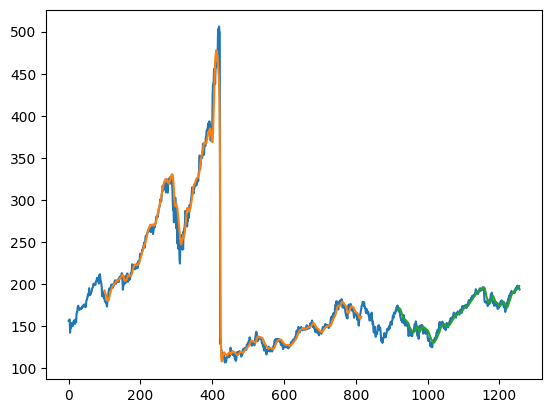

In [36]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

440

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.1882279273638071,
 0.18036318096430803,
 0.18274264245460237,
 0.1787100814026299,
 0.17815904821540385,
 0.17770820288040068,
 0.18189104571070758,
 0.1768566061365059,
 0.1746524733876017,
 0.16821540388227924,
 0.16944270507200998,
 0.17282404508453347,
 0.17630557294927984,
 0.18604884157795865,
 0.17417658108954281,
 0.17976205385097055,
 0.18371947401377575,
 0.1935629304946775,
 0.20240450845335,
 0.20295554164057605,
 0.20693800876643703,
 0.20753913587977452,
 0.19053224796493418,
 0.1771321227301189,
 0.17868503443957418,
 0.18164057608015027,
 0.17397620538509706,
 0.16874139010644956,
 0.17257357545397617,
 0.17074514715090788,
 0.17815904821540385,
 0.18091421415153408,
 0.17194740137758296,
 0.16804007514088914,
 0.17019411396368184,
 0.173425172197871,
 0.16310582341891044,
 0.15927363807138384,
 0.15992485911083276,
 0.16122730118973072,
 0.16758922980588598,
 0.16420788979336254,
 0.1673638071383844,
 0.17049467752035058,
 0.17695679398872882,
 0.18071383844708827,


In [43]:
lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


[[0.22680851817131042], [0.22652557492256165], [0.22666679322719574], [0.22713863849639893], [0.22782213985919952], [0.22862541675567627], [0.22948980331420898], [0.23038247227668762], [0.2312871515750885], [0.23219650983810425], [0.2331083118915558], [0.2340223789215088], [0.2349396049976349], [0.235861137509346], [0.23678849637508392], [0.23772278428077698], [0.23866528272628784], [0.23961694538593292], [0.2405785322189331], [0.24155078828334808], [0.2425340861082077], [0.2435288280248642], [0.24453520774841309], [0.24555349349975586], [0.24658365547657013], [0.24762596189975739], [0.2486802339553833], [0.24974673986434937], [0.25082555413246155], [0.2519168257713318]]


In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

1257

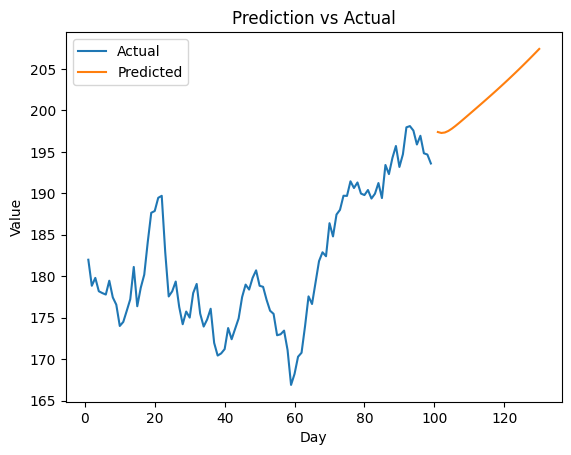

In [49]:

lst_output = np.array(lst_output)
if len(lst_output) > len(day_pred):
    lst_output = lst_output[:len(day_pred)]

# Plotting the data
plt.plot(day_new[:len(df1)-1158], scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.xlabel('Day')
plt.ylabel('Value')
plt.title('Prediction vs Actual')
plt.legend(['Actual', 'Predicted'])
plt.show()


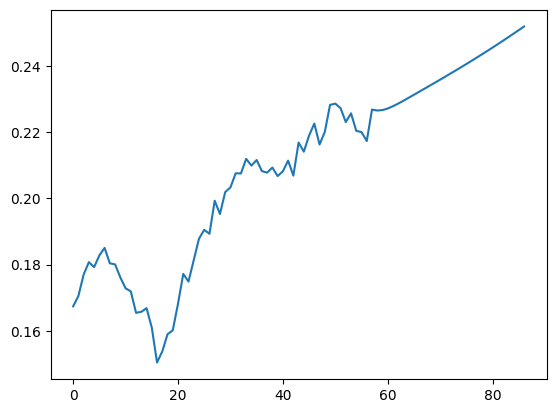

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [51]:
df3=scaler.inverse_transform(df3).tolist()

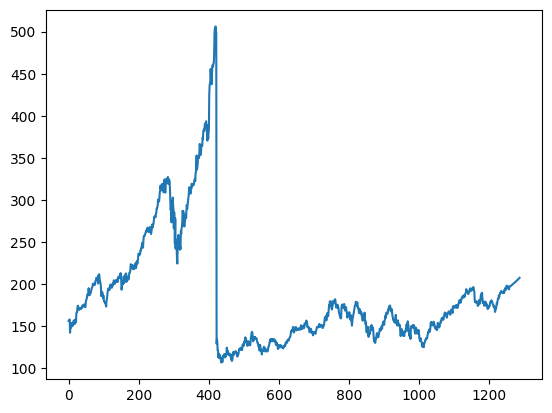

In [52]:
plt.plot(df3)